# Intro to Superresolution

##Stuff to be written

In [16]:
%matplotlib inline
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import scipy.special

In [17]:
pi, np.pi

(3.141592653589793, 3.141592653589793)

In [18]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

ImportError: No module named seaborn

In [19]:
#sns.set_context()

Imports for the interactive widgets:

In [20]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import display, display_png, display_svg, clear_output
from IPython.core.pylabtools import print_figure

In [21]:
#Define points for later
xdist = arange(-80,80,0.1)
ydist = xdist

##Equation that dictates the ideal point spread function emmitted from a point dipole source

Here the equation:

$$
I(x,y) = \frac{\pi^4}{\epsilon_0^2 n n^\prime} \frac{\mu^2}{\lambda^6} \frac{NA^4}{M^2} \left[ \frac{J_1(2 \pi \tilde{\rho})}{2 \pi \tilde{\rho}} \right]^2, \space \space \tilde{\rho}= \frac{NA (x^2+y^2)}{M \lambda}
$$

Something inline $X$.

In [22]:
%%latex
\begin{aligned}
I(x,y) = \frac{\pi^4}{\epsilon_0^2 n n^\prime} \frac{\mu^2}{\lambda^6} \frac{NA^4}{M^2} \left[ \frac{J_1(2 \pi \tilde{\rho})}{2 \pi \tilde{\rho}} \right]^2, \space \space \tilde{\rho}= \frac{NA (x^2+y^2)}{M \lambda}
\end{aligned}

<IPython.core.display.Latex object>

In [23]:
xdata = arange(0,5,0.1)

def fexp(x,a,b,c):
    return a*exp(-b*x)+c

def fgau(x,a,b,c):
    return a*exp(-(x-b)**2/(2*c**2))

def ddata(x,ns):
    noise = ns*randn(len(x))
    return fexp(x,2.5,1.3,0.5) + noise

ydata = ddata(xdata,0.2)

###This is known as the Airy Function with J being a Bessel function of the first kind

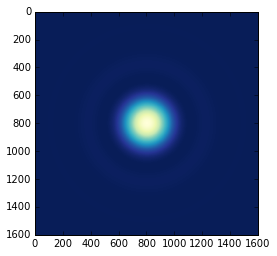

In [45]:
@interact(x_0 =(-80,80,0.1), y_0 = (-80,80,1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy(x_0=0, y_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy-y_0)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    #I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    #h = plt.contourf(xdist,ydist,I)
    imshow(I, cmap='YlGnBu_r', interpolation='nearest');

Check colormaps here: http://matplotlib.org/users/colormaps.html

##It is easier to visualize on a single axis. Let's choose the x-axis

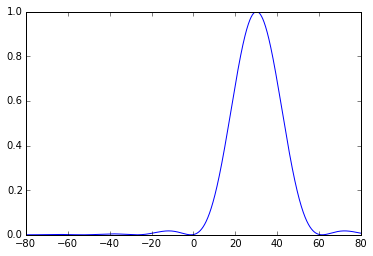

In [48]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    

    plot(xdist,I[I.shape[1]/2,:])

##Fit Gaussian to our Airy Function


Normalization      FWHM         Center   
------------- ------------- -------------
 1.0172837386 46.4296303844 25.8999999718

  Norm std dev     FWHM std dev   Center std dev
---------------- --------------- ---------------
0.00108524495553 0.0133259719689 0.0133259720614

Gau fit parameters      1.017 25.900 10.818
Gau fit std dev         0.001  0.013  0.013


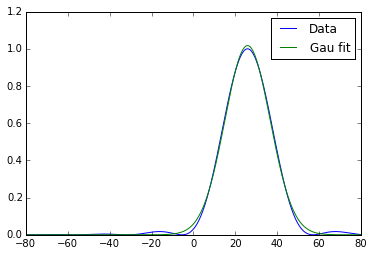

In [49]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    


    pg,cg = curve_fit(fgau,xdist,I[I.shape[1]/2,:])
    
    ygau = fgau(xdist,*pg)
    
    plot(xdist,I[I.shape[1]/2,:],'b-',label='Data')

    plot(xdist,ygau,'g-',label='Gau fit')
    legend()
    print ''
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print t
    
    print ''

    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print tstddev
    
    print ''
    
    print 'Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg)
    print 'Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg)))

But real life experiments cannot obtain infinite resolution. We are limited by the tools that we have. In our case of a collecting photons from a point dipole source, we a limited in our spatial resolution by our pixels.

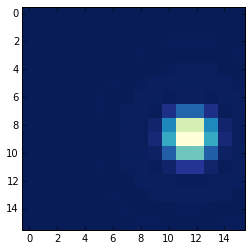

In [51]:
@interact(x_0 =(-80,80,0.1), y_0 = (-80,80,1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy(x_0=0, y_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy-y_0)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    ypixel = xpixel
    imshow(pixel,cmap='YlGnBu_r',interpolation = 'nearest')

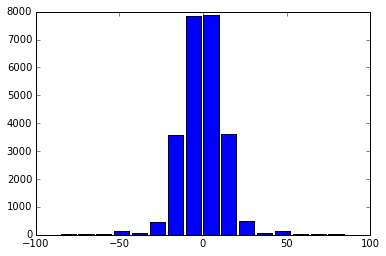

In [52]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    ypixel = xpixel
    centerpixel = xpixel-5
    bar(centerpixel,pixel[pixel.shape[1]/2,:],width=9)


Normalization      FWHM         Center   
------------- ------------- -------------
 8738.6037538 50.5672643596 22.6660443715

Norm std dev  FWHM std dev  Center std dev
------------ -------------- --------------
91.991576015 0.143302159192 0.143143187296

Gau fit parameters     8738.604 22.666 11.782
Gau fit std dev        91.992  0.143  0.143


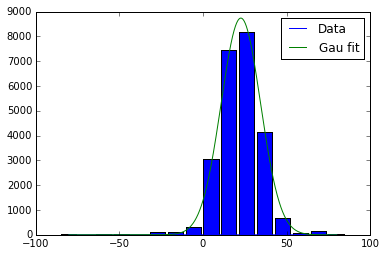

In [54]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5
    
    pg,cg = curve_fit(fgau,xpixel,pixel[pixel.shape[1]/2,:])
    
    ygau = fgau(xdist,*pg)
    
    
    bar(centerpixel,pixel[pixel.shape[1]/2,:],width=9)
    plot(xdist,I[I.shape[1]/2,:],'b-',label='Data')
    
    plot(xdist,ygau,'g-',label='Gau fit')
    legend()
    
    print ''
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print t
    
    print ''
    
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print tstddev
    
    print ''
    
    print 'Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg)
    print 'Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg)))

##Noise

Unfortunately, this is still very ideal. There can be noise in our system from other sources (autoflourecense, scattering, or  photons from a nearby lightsource leaking into our sample box. For now, we will simply the problem by looking at a single image in a movie.

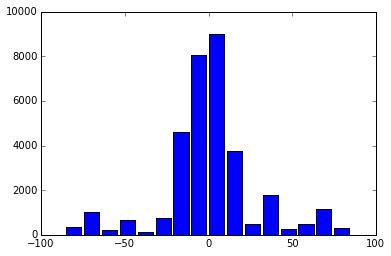

In [56]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1), NoiseCenter = (100, 500, 10), NoiseWidth = (10, 200, 10))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4, NoiseCenter = 500, NoiseWidth = 200):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5

    noise = np.random.normal(loc=500.0,scale=500.0,size=(16,16))
    pixelnoise = pixel + abs(noise)
    bar(centerpixel,pixelnoise[pixelnoise.shape[1]/2,:],width=9)


Normalization      FWHM         Center   
------------- ------------- -------------
8759.62034685 57.2463651586 19.7387735865

 Norm std dev  FWHM std dev Center std dev
------------- ------------- --------------
384.254939705 0.67563704495  0.67560177543



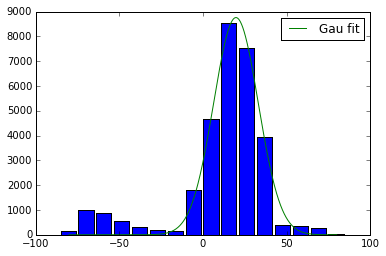

In [57]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1), NoiseCenter = (100, 500, 10), NoiseWidth = (10, 200, 10))
def plot_airy2d(x_0=0, l = 600, M = 60, NA = 1.4, NoiseCenter = 500, NoiseWidth = 200):

    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5

    noise = np.random.normal(loc=500.0,scale=500.0,size=(16,16))
    pixelnoise = pixel + abs(noise)
    bar(centerpixel,pixelnoise[pixelnoise.shape[1]/2,:],width=9)
    
    pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
    
    ygau = fgau(xdist,*pg)
    
    
    bar(centerpixel,pixelnoise[pixelnoise.shape[1]/2,:],width=9)
    plot(xdist,ygau,'g-',label='Gau fit')
    legend()
    
    print ''
    t = Table()
    t['Normalization'] = [pg[0]]
    t['FWHM'] = [2.0*math.sqrt(2.0*math.log(10.0))*pg[2]]
    t['Center'] = [pg[1]]
    print t
    
    print ''
    
    tstddev = Table()
    tstddev['Norm std dev'] = [sqrt(diag(cg))[0]]
    tstddev['FWHM std dev'] = [sqrt(diag(cg))[2]]
    tstddev['Center std dev'] = [sqrt(diag(cg))[1]]
    print tstddev
    
    print ''
    

#Finding Standard Deviation of Center

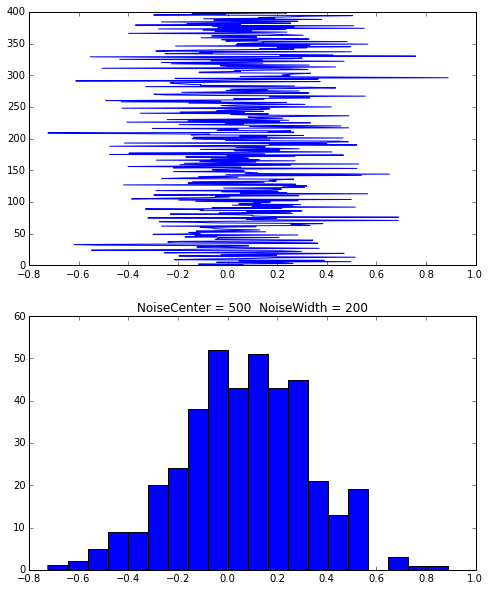

In [60]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1), NoiseCenter = (100, 500, 10), NoiseWidth = (10, 200, 10))
def plot_noise(x_0 = 0, l = 600, M = 60, NA = 1.4, NoiseCenter=500.0, NoiseWidth=200.0):
    
    
    # Define a few parameters for the Airy Function
    
    # Universal Constants
    epsilon_0 = 1 # Permitivity of Free Space (assuming atomic units)
    
    # Experimental Constants
    mu = 1        # Dipole Moment (dependent on which dye is used)
    #NA = 1.4      # Numerical Aperature
    #l  = 600      # Wavelength in nm
    n  = 1.518    #index of refraction of material surrounding emmitter
    n_prime = 1.518 #index of refraction of objective
    #M  = 60       # Magnification (60x)
    
    # Function
    xx, yy = meshgrid(xdist, ydist, sparse=True) # Prepares Grid Points
    rho = np.sqrt((xx-x_0)**2+(yy)**2) # Distance from center
    rho_tilde = 500*rho*NA/(M*l) # The 500 is just a scaling factor
    
    #I_0 = (math.pi**4/(epsilon_0*n*n_prime))*(mu**2/l**6)*(NA**4/M**2)  # Represents the number of photons we recieve
    
    I = (2*scipy.special.jv(1,2*math.pi*rho_tilde)/(2*math.pi*rho_tilde))**2 #Represents where we recieve the photons spatially
    
    pixel = I.reshape(16,100,16,100)
    pixel = pixel.sum(axis=3).sum(axis=1)
    xpixel = linspace(-80,80,16)
    centerpixel = xpixel-5
    
    sample = 400
    Average = 1
    
    noise_all = np.random.normal(loc=NoiseCenter, scale=NoiseWidth, size=(sample, 16, 16))
    pos = np.zeros(shape=(sample))
    for n in range(0, sample):
        noise = noise_all[n]
        pixelnoise = pixel + abs(noise)
        pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
        pos[n]=pg[1]

    poshist, posedge = histogram(pos,20)

    plt.figure(1,figsize=(8, 10))
    plt.subplot(211)
    plt.plot(pos,range(0,sample))

    plt.subplot(212)
    plt.hist(pos,20)
    plt.title('NoiseCenter = %d  NoiseWidth = %d' % (NoiseCenter, NoiseWidth))
    
    # Hack that may not be needed anymore
    #fig = gcf()
    #plt.close()
    #display(fig)

See also: http://stackoverflow.com/questions/24961674/ipython-notebook-widgets-for-matplotlib-interactivity

In [62]:
#%load_ext line_profiler

In [63]:
#%lprun -f plot_noise plot_noise()

In [36]:
sample = 10000
Average = 1
NoiseCenter = 500.0
NoiseWidth = 200.0

pos = np.zeros(shape=(sample))
for n in range(0,sample):
    noise = np.random.normal(loc=NoiseCenter,scale=NoiseWidth,size=(16,16))
    pixelnoise = pixel + abs(noise)
    pg,cg = curve_fit(fgau,xpixel,pixelnoise[pixelnoise.shape[1]/2,:])
    pos[n]=pg[1]


poshist, posedge = histogram(pos,20)
# TO FINISH AVERAGING LATER
#pixel = I.reshape(16,100,16,100)
#pixel = pixel.sum(axis=3).sum(axis=1)
#xpixel = linspace(-80,80,16)

NameError: name 'pixel' is not defined

In [65]:
#plt.figure(1,figsize=(8, 20))
#plt.subplot(211)
#plt.plot(pos,range(0,sample))
#
#plt.subplot(212)
#plt.hist(pos,20)
#plt.show()

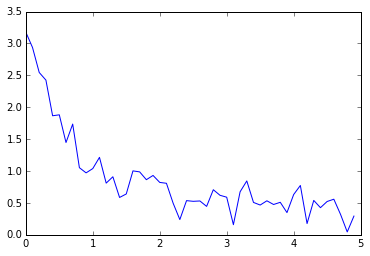

In [38]:
plot(xdata,ydata)

Fit data to exp and gau curves

In [66]:
pe,ce = curve_fit(fexp,xdata,ydata)
pg,cg = curve_fit(fgau,xdata,ydata)
yexp = fexp(xdata,*pe)
ygau = fgau(xdata,*pg)
    
plot(xdata,ydata,'-sb',ls=':',label='Data')

plot(xdata,yexp,'r-',label='Exp fit')
plot(xdata,ygau,'g-',label='Gau fit')
legend()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Print Fit Parameters

In [40]:
print 'Exp fit params         {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pe)
print 'Exp fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(ce)))
print 'Gau fit parameters     {0:6.3f} {1:6.3f} {2:6.3f}'.format(*pg)
print 'Gau fit std dev        {0:6.3f} {1:6.3f} {2:6.3f}'.format(*sqrt(diag(cg)))

Exp fit params          2.751  1.460  0.478
Exp fit std dev         0.128  0.129  0.040


NameError: name 'pg' is not defined